In [3]:
import numpy as np

def cargar_datos(ruta_archivo):
    #Carga los datos del archivo CSV utilizando Numpy
    datos = np.genfromtxt(ruta_archivo, delimiter=',', skip_header=1)
    return datos

ruta_archivo = '/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/retail_sales_dataset.csv'

datos = cargar_datos(ruta_archivo)

print(datos)


[[   1.   nan   nan ...    3.   50.  150.]
 [   2.   nan   nan ...    2.  500. 1000.]
 [   3.   nan   nan ...    1.   30.   30.]
 ...
 [ 998.   nan   nan ...    4.   25.  100.]
 [ 999.   nan   nan ...    3.   50.  150.]
 [1000.   nan   nan ...    4.   30.  120.]]


Exploración de Datos

- Filtra los datos para mostrar solo las ventas de una categoría de producto específica.
- Realiza operaciones de suma, resta, multiplicación y división en los datos para obtener estadísticas adicionales.

In [4]:
#Primeramente estoy viendo que hay un problema. Algunos datos se imprimen como nan porque Numpy trata de tomarlo como números.
#Para arreglarlo debo usar .astype(str)
print(datos[:, 5].astype(str))


['nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'n

In [5]:
#Utilizaré pandas para solucionarlo
import pandas as pd
data = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/retail_sales_dataset.csv')
print(data)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

Como vemos ahora sin funciona correctamente, los datos se cargan de buena manera y podemos proseguir con el filtrado

In [6]:
#Filtraremos el total de ventas para la categoría electronics
electronic_sales = data[data["Product Category"] == "Electronics"]
print(electronic_sales) 

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
2                 3  2023-01-13     CUST003    Male   50      Electronics   
7                 8  2023-02-22     CUST008    Male   30      Electronics   
8                 9  2023-12-13     CUST009    Male   63      Electronics   
12               13  2023-08-05     CUST013    Male   22      Electronics   
14               15  2023-01-16     CUST015  Female   42      Electronics   
..              ...         ...         ...     ...  ...              ...   
988             989  2023-12-28     CUST989  Female   44      Electronics   
991             992  2023-08-21     CUST992  Female   57      Electronics   
992             993  2023-02-06     CUST993  Female   48      Electronics   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
2           1              30

In [7]:
#Ahora solo mostraré las ventas y la categoría electronics
print(electronic_sales[["Product Category", "Quantity"]])

    Product Category  Quantity
2        Electronics         1
7        Electronics         4
8        Electronics         2
12       Electronics         3
14       Electronics         4
..               ...       ...
988      Electronics         1
991      Electronics         2
992      Electronics         3
998      Electronics         3
999      Electronics         4

[342 rows x 2 columns]


In [8]:
# Ahora veremos cual es el total de ventas para la categoría electronics
total_ventas_electronics = electronic_sales["Quantity"].sum() #Con .sum() sumo todos los valores de la columna
print(total_ventas_electronics)

849


In [9]:
# Puedo ver ahora cuál es la cantidad de dinero que se obtuvo vendiendo electronics
total_amount_electronics = electronic_sales["Total Amount"].sum()
print(total_amount_electronics)

#Puedo ver también la diferencia entre el precio unitario más alto y el precio unitario más bajo
difference_price_per_unit = electronic_sales["Price per Unit"].max() - electronic_sales["Price per Unit"].min()
print(difference_price_per_unit)

#El precio unitario más bajo para electronics es:
min_price_per_unit = electronic_sales["Price per Unit"].min()
print(min_price_per_unit)

#Podemos calcular el precio por unidad por la cantidad para saber el monto total en las primeras 5 transacciones.
first_five_transaccions_amount = electronic_sales["Price per Unit"] * electronic_sales["Quantity"]
print(first_five_transaccions_amount.head())

#Si calculamos la cantidad todal vendida, y el monto total, podemos dividirlo para tener un promedio de precio unitario
price_per_unit_promedio = total_amount_electronics / total_ventas_electronics
print(price_per_unit_promedio)

156905
475
25
2       30
7      100
8      600
12    1500
14    2000
dtype: int64
184.811542991755


In [10]:
#Ahora imprimo un resumen de lo último
print(f"El total de ventas para la categoría ventas es: {total_ventas_electronics}")
print(f"El total de dinero que se obtuvo vendiendo electronics es: {total_amount_electronics}")
print(f"La diferencia entre el precio unitario más alto y el precio unitario más bajo es: {difference_price_per_unit}")
print(f"El precio unitario más bajo para electronics es: {min_price_per_unit}")
print(f"El precio por unidad por la cantidad para saber el monto total en las primeras 5 transacciones: {first_five_transaccions_amount.head()}")
print(f"El promedio de precio unitario de electronics es: {price_per_unit_promedio}")

El total de ventas para la categoría ventas es: 849
El total de dinero que se obtuvo vendiendo electronics es: 156905
La diferencia entre el precio unitario más alto y el precio unitario más bajo es: 475
El precio unitario más bajo para electronics es: 25
El precio por unidad por la cantidad para saber el monto total en las primeras 5 transacciones: 2       30
7      100
8      600
12    1500
14    2000
dtype: int64
El promedio de precio unitario de electronics es: 184.811542991755


# Proyecto I - Parte 2(Core)

Análisis y Predicción de Ventas en una Tienda de Retail



Parte II: Análisis Exploratorio con Pandas

En esta segunda parte del proyecto, vamos a utilizar Pandas para realizar un análisis exploratorio más detallado de nuestro dataset de ventas. El objetivo es aplicar técnicas de carga, exploración, filtrado y slicing de datos para obtener una comprensión profunda de los datos y preparar el dataset para futuros análisis y modelados predictivos.

Instrucciones

1. Preparación del Entorno
- Asegúrate de tener instalado Pandas en tu entorno de trabajo.
- Utiliza el archivo retail_sales.csv del proyecto inicial. Si aún no lo tienes, descarga el archivo correspondiente.
2. Cargar los Datos
- Carga el archivo retail_sales.csv en un DataFrame de Pandas.
- Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.
3. Exploración Inicial de los Datos
- Muestra las últimas 5 filas del DataFrame.
- Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
- Genera estadísticas descriptivas del DataFrame utilizando el método describe().
4. Inspección de los Datos
- Inspecciona los tipos de datos de cada columna utilizando el atributo dtypes.
- Cuenta los valores únicos en la columna Producto utilizando el método value_counts().
- Muestra todos los valores únicos en la columna Tienda utilizando el método unique().
5. Filtrado de Datos
- Filtra el DataFrame para mostrar solo las filas donde las ventas (Ventas) sean mayores a 50.
- Filtra el DataFrame para mostrar solo las filas donde el precio (Precio) sea menor a 0.5.
- Utilizando el método query(), filtra el DataFrame para mostrar las filas donde el producto sea electronic y las ventas sean mayores a 30.
6. Slicing de Datos
- Selecciona y muestra solo las columnas Producto y Ventas del DataFrame.
- Utilizando loc[], selecciona y muestra las filas de la 5 a la 10 (inclusive) y las columnas Producto y Precio.
- Utilizando iloc[], selecciona y muestra las primeras 5 filas y las primeras 3 columnas del DataFrame.

In [11]:
import pandas as pd
data = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/retail_sales_dataset.csv')
#Primeras 10 filas del DataFrame para confirmar que 
# los datos se han cargado correctamente.
primeras_10_filas = data.head(10)
print(primeras_10_filas)

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [12]:
#Muestra las últimas 5 filas
ultimas_5_filas = data.tail()
print(ultimas_5_filas)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [13]:
#Utiliza el método info() para obtener información 
# general sobre el DataFrame, incluyendo el número de
# entradas, nombres de las columnas, tipos de datos y memoria utilizada.
metodo_info = data.info()
print(metodo_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [14]:
#Estadisticas descriptivas
estadisticas_desc = data.describe()
print(estadisticas_desc)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [15]:
#Inspeccionando los tipos de datos de cada columna
data_type = data.dtypes
print(data_type)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [16]:
#Valores únicos en la columna Producto
valores_unicos_producto = data["Product Category"].value_counts()
print(valores_unicos_producto)

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [17]:
#Mostrar valor únicos de la columna Product category con unique()
muestra_valores_unicos_produc = data["Product Category"].unique()
print(muestra_valores_unicos_produc)

['Beauty' 'Clothing' 'Electronics']


In [18]:
#Filas donde las ventas sean mayores a 50
ventas_more_50 = data[data["Total Amount"] > 50]
print(ventas_more_50)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
7                 8  2023-02-22     CUST008    Male   30      Electronics   
..              ...         ...         ...     ...  ...              ...   
993             994  2023-12-18     CUST994  Female   51           Beauty   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [19]:
#Filas donde el precio sea menor a 0.5
precio_less_0_5 = data[data["Price per Unit"] < 0.5]
print(precio_less_0_5)

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [20]:
#Filas donde el producto sea electronics y las ventas mayores a 30
electronic_less_30 = data.query('`Product Category` == "Electronics" and `Total Amount` > 30')
print(electronic_less_30)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
7                 8  2023-02-22     CUST008    Male   30      Electronics   
8                 9  2023-12-13     CUST009    Male   63      Electronics   
12               13  2023-08-05     CUST013    Male   22      Electronics   
14               15  2023-01-16     CUST015  Female   42      Electronics   
17               18  2023-04-30     CUST018  Female   47      Electronics   
..              ...         ...         ...     ...  ...              ...   
984             985  2023-05-30     CUST985  Female   19      Electronics   
991             992  2023-08-21     CUST992  Female   57      Electronics   
992             993  2023-02-06     CUST993  Female   48      Electronics   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
7           4              25

In [21]:
#Muestra solo las columnas producto y ventas
producto_ventas = data[["Product Category", "Total Amount"]]
print(producto_ventas)

    Product Category  Total Amount
0             Beauty           150
1           Clothing          1000
2        Electronics            30
3           Clothing           500
4             Beauty           100
..               ...           ...
995         Clothing            50
996           Beauty            90
997           Beauty           100
998      Electronics           150
999      Electronics           120

[1000 rows x 2 columns]


In [22]:
#Muestra filas de la 5 a la 10 y las columnas producto y precio utilizando loc[]
filas_5_10_producto_tienda = data.loc[5:10, ["Product Category", "Price per Unit"]]
print(filas_5_10_producto_tienda)


   Product Category  Price per Unit
5            Beauty              30
6          Clothing              25
7       Electronics              25
8       Electronics             300
9          Clothing              50
10         Clothing              50


In [23]:
#Con iloc muestra las 5 primeras filas y las primeras 3 columnas
primeras_5_filas_primeras_3_columnas = data.iloc[:5, :3]
print(primeras_5_filas_primeras_3_columnas)

   Transaction ID        Date Customer ID
0               1  2023-11-24     CUST001
1               2  2023-02-27     CUST002
2               3  2023-01-13     CUST003
3               4  2023-05-21     CUST004
4               5  2023-05-06     CUST005


# Proyecto I - Parte 3(Core)

Análisis y Predicción de Ventas en una Tienda de Retail (Core)

Parte III: Transformación y Análisis Avanzado de Datos con Pandas

En esta tercera parte del proyecto, continuaremos trabajando con el dataset de ventas que utilizamos en la Parte II. En esta fase, aplicaremos técnicas avanzadas de transformación y análisis de datos utilizando las nuevas habilidades adquiridas en Pandas, tales como agrupaciones complejas y el uso del método apply. Nos enfocaremos en extraer insights más profundos y preparar los datos para futuros análisis y modelos predictivos.

Instrucciones

1. Transformación de Datos
- Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.
- Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).
2. Agrupación y Agregación
- Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
- Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.
3. Análisis Personalizado con apply
- Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
- Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.
4. Documentación
- Comentarios claros: Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
- Código legible: Asegúrate de que el código sea legible y esté bien comentado.

In [24]:
import pandas as pd
import numpy as np

print(data.head()) #Esto es para verificar que los datos están bien cargados

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [25]:
#Crea nuevas columnas
data['Total'] = data['Quantity'] * data['Price per Unit']
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Total  
0         3              50           150    150  
1         2             500          1000   1000  
2         1              30            30     30  
3         1             500           500    500  
4         2              50           100    100  


In [26]:
#Normalizando las ventas
max_value = data['Total'].max()
min_value = data['Total'].min()
data['Ventas_normalized'] = data['Total'].apply(lambda x: (x - min_value) / (max_value - min_value))
print(data.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Total  Ventas_normalized  
0         3              50           150    150           0.063291  
1         2             500          1000   1000           0.493671  
2         1              30            30     30           0.002532  
3         1             500           500    500           0.240506  
4         2              50           100    100           0.037975  


In [27]:
print(max_value)
print(min_value)

2000
25


In [28]:
#Clasificaremos ahora las ventas en categorías significativas
data['Clasificacion'] = data['Total Amount'].apply(lambda x: 'Alto' if x >= 1000 else ('Medio' if x >= 100 else 'Bajo'))
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Total  Ventas_normalized  \
0         3              50           150    150           0.063291   
1         2             500          1000   1000           0.493671   
2         1              30            30     30           0.002532   
3         1             500           500    500           0.240506   
4         2              50           100    100           0.037975   

  Clasificacion  
0         Medio  
1          Alto  
2          Bajo  
3         Medio  
4         Medio  


In [29]:
#Agrupando por múltiples columnas
#Agruparemos por gender el total amount
total_amount_por_gender = data.groupby('Gender')['Total Amount'].sum()
print(total_amount_por_gender)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [30]:
#Agruparemos por producto category también
total_amount_por_category = data.groupby('Product Category')['Total Amount']. sum()
print(total_amount_por_category)

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [31]:
#Calcularemos max, min, varianza, desviación, promedio, count
#Todos del grupo de genero
max_por_gender = data.groupby('Gender')['Total Amount'].max()
min_por_gender = data.groupby('Gender')['Total Amount'].min()
varianza_por_gender = data.groupby('Gender')['Total Amount'].var()
desviación_por_gender = data.groupby('Gender')['Total Amount'].std()
promedio_por_gender = data.groupby('Gender')['Total Amount'].mean()
conteo_por_gender = data.groupby('Gender')['Total Amount'].count()
print(f'El maximo por genero es: {max_por_gender}')
print(f'El mínimo por genero es {min_por_gender}')
print(f'La varianza por genero es: {varianza_por_gender}')
print(f'La desviacion estándar por género es {desviación_por_gender}')
print(f'El promedio por genero es: {promedio_por_gender}')
print(f'El conteo por genero es: {conteo_por_gender}')

El maximo por genero es: Gender
Female    2000
Male      2000
Name: Total Amount, dtype: int64
El mínimo por genero es Gender
Female    25
Male      25
Name: Total Amount, dtype: int64
La varianza por genero es: Gender
Female    307247.792288
Male      320847.259714
Name: Total Amount, dtype: float64
La desviacion estándar por género es Gender
Female    554.299371
Male      566.433809
Name: Total Amount, dtype: float64
El promedio por genero es: Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
El conteo por genero es: Gender
Female    510
Male      490
Name: Total Amount, dtype: int64


In [32]:
#Podemos calcular la desviación media absoluta
#Utilizamos apply que es una forma de hacer funciones que en pandas serían complicadas
mean_Total_Amount = data['Total Amount'].mean()
data['MAD_Total_Amount'] = data['Total Amount'].apply(lambda x: np.abs(x - mean_Total_Amount))
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Total  Ventas_normalized  \
0         3              50           150    150           0.063291   
1         2             500          1000   1000           0.493671   
2         1              30            30     30           0.002532   
3         1             500           500    500           0.240506   
4         2              50           100    100           0.037975   

  Clasificacion  MAD_Total_Amount  
0         Medio             306.0  
1          Alto             544.0  
2          Baj

# Proyecto I - Parte IV (Core)
Análisis y Predicción de Ventas en una Tienda de Retail
Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

Instrucciones

1. Continuar desde la Parte III
- Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.
2. Análisis Descriptivo y Visualización
- Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
- Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
- Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
- Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
- Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.
3. Generar un Pull Request en GitHub
- Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

In [33]:
#Hagamos un análisis descriptivo
#Primero vemos si está correctamente cargado
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Total  Ventas_normalized  \
0         3              50           150    150           0.063291   
1         2             500          1000   1000           0.493671   
2         1              30            30     30           0.002532   
3         1             500           500    500           0.240506   
4         2              50           100    100           0.037975   

  Clasificacion  MAD_Total_Amount  
0         Medio             306.0  
1          Alto             544.0  
2          Baj

In [34]:
data_describe = data.describe()
print(data_describe)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount  \
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000   
mean       500.500000    41.39200     2.514000      179.890000    456.000000   
std        288.819436    13.68143     1.132734      189.681356    559.997632   
min          1.000000    18.00000     1.000000       25.000000     25.000000   
25%        250.750000    29.00000     1.000000       30.000000     60.000000   
50%        500.500000    42.00000     3.000000       50.000000    135.000000   
75%        750.250000    53.00000     4.000000      300.000000    900.000000   
max       1000.000000    64.00000     4.000000      500.000000   2000.000000   

             Total  Ventas_normalized  MAD_Total_Amount  
count  1000.000000        1000.000000       1000.000000  
mean    456.000000           0.218228        459.000000  
std     559.997632           0.283543        320.476919  
min      25.000000           0.000000         4

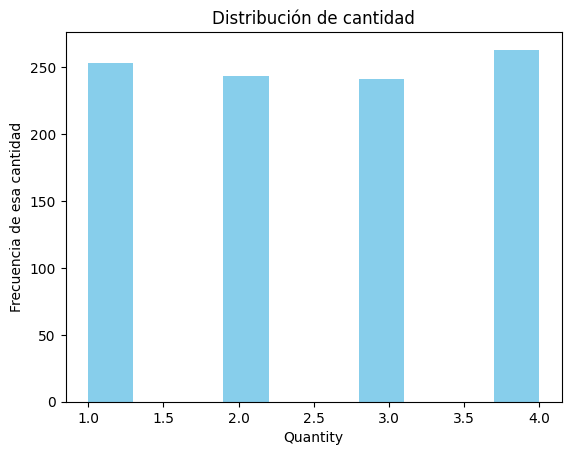

In [41]:
#Ahora haremos histogramas
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['Quantity'], color = 'skyblue')
plt.title('Distribución de cantidad')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia de esa cantidad')
plt.show()

In [39]:
#Lo que podemos decir de esto es que tenemos una distribución uniforme.
#Se puede concluir que no hay una preferencia clara por una cantidad en específico.
#No hay una tendecia hacia una cantidad más alta o más baja.

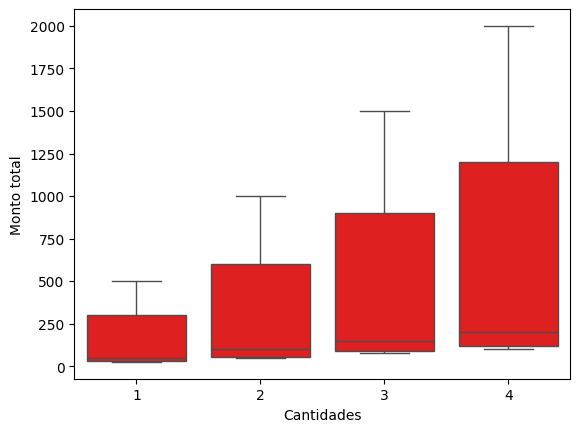

In [48]:
#Se me ocurre un boxplot entre 'Total Amount' contra 'Quantity'
sns.boxplot(y = 'Total Amount', x = 'Quantity', data = data, color = 'r')
plt.xlabel('Cantidades')
plt.ylabel('Monto total')
plt.show()

In [49]:
#Lo que podemos ver a simple vista es que a mayor cantidad tenemos un mayor monto.
#Esto es esperado así que está bien.
#Viendo los bigotes, se ve que la variabilidad aumenta conforme aumentan las cantidades.
#Con eso podemos decir que podría haber una gran variación en el precio unitario, puede haber descuentos
#por compras grandes.
#No se ven valores atípicos

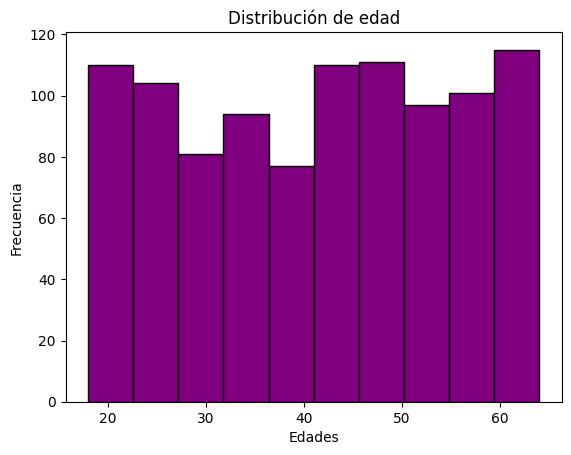

In [57]:
plt.hist(data['Age'], color = 'purple', edgecolor = 'black')
plt.title('Distribución de edad')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

In [68]:
#Se puede decir que no hay muchas diferencias entre las edades y la frecuencia
#Hay rangos altos en 20, de 40 a 50 y de +60. Esto indica que hay más personas de estas edades
#que compran. Y las que menos lo hacen son de 28 - 40 aproximadamente.
#Se puede asociar esto a que en ese rango etario uno tiene muchas responsabilidades y el poder
#adquisitivo quizás no es tan alto por ese motivo.

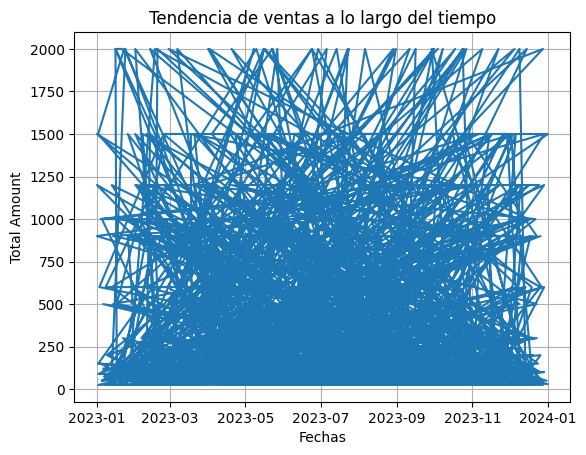

In [70]:
#Ahora haré el gráfico de líneas
plt.plot(data['Date'], data['Total Amount'])
plt.title('Tendencia de ventas a lo largo del tiempo')
plt.xlabel('Fechas')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

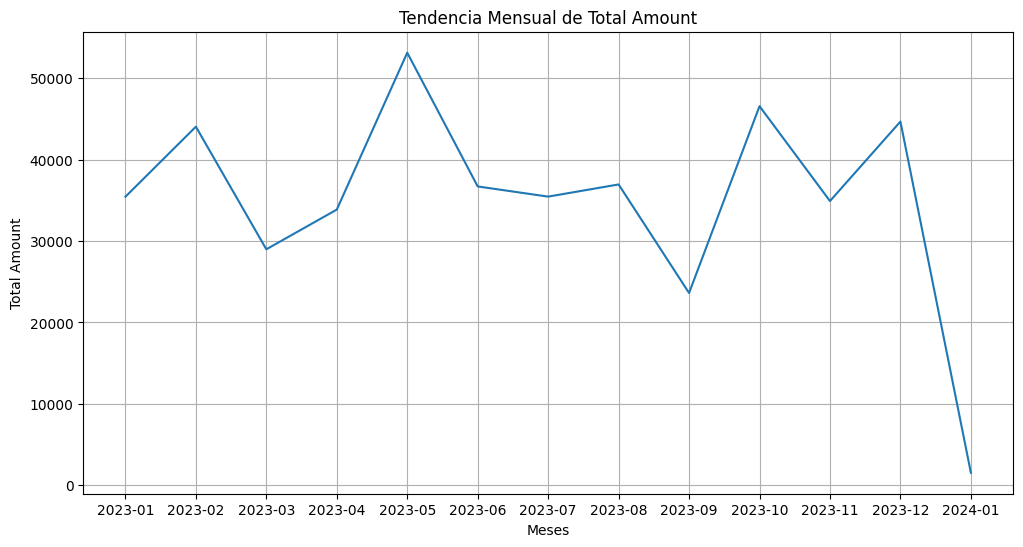

In [86]:
#Como se ve muy desordenado, trataré de hacer más sencillo el gráfico
#Hay una gran cantidad de datos, lo que hace que sea difícil de interpretar
#Si agrupo los datos por meses seguramente será más sencilla la visualización.
data_time_arreglado = data.groupby(data['Date'].dt.to_period('M'))
total_amount_por_mes = data_time_arreglado['Total Amount'].sum()
#Ahora graficamos
plt.figure(figsize = (12, 6))
plt.plot(total_amount_por_mes.index.astype(str), total_amount_por_mes.values)
plt.title('Tendencia Mensual de Total Amount')
plt.xlabel('Meses')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


In [87]:
#Lo que podemos concluir viendo el gráfico es que tenemos picos de venta en Mayo del 2023, también en octubre.
#Hay caídas en marzo, septiembre y noviembre.
#Esto se puede asociar a que en mayo la gente compró más por tener mayor poder adquisitivo.

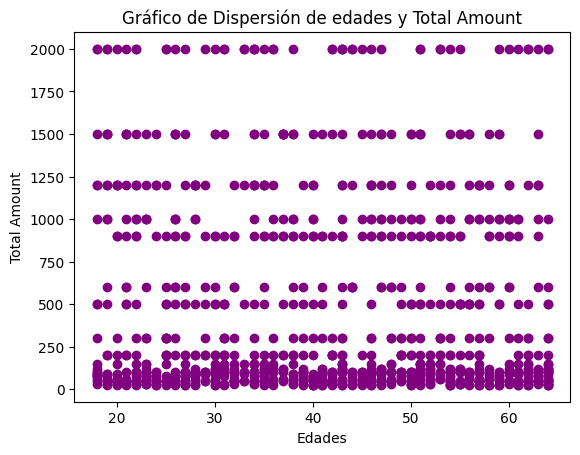

In [93]:
#Ahora haremos gráficos de dispersión
plt.scatter(data['Age'], data['Total Amount'], color = 'purple')
plt.title('Gráfico de Dispersión de edades y Total Amount')
plt.xlabel('Edades')
plt.ylabel('Total Amount')
plt.show()

In [94]:
#Lo que podemos decir con esto es que, como se ve que los puntos están distribuidos a 
#lo largo del gráfico, el monto total no varía en función de la edad.
#En los puntoz de abajo hay una gran agrupación, esto quiere decir que hay una tendencia
#a gastar esas cantidades.

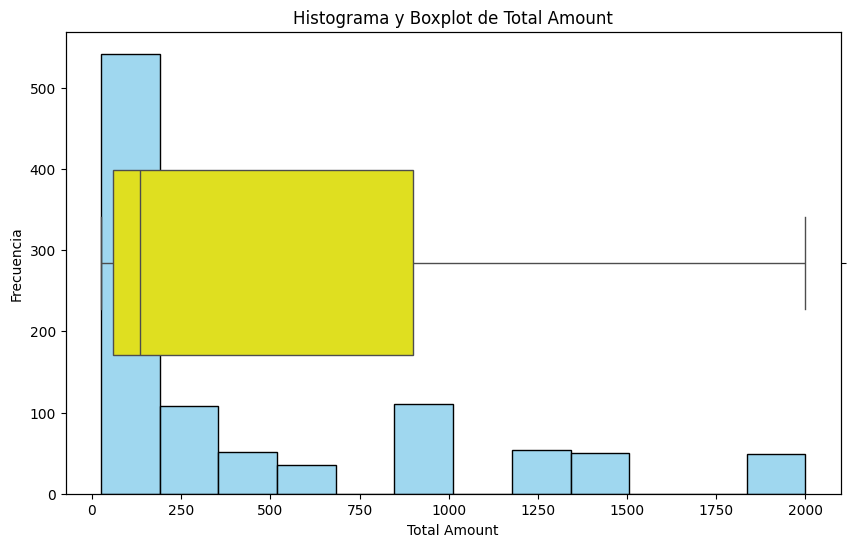

In [95]:
#Ahora combinaremos histogramas y boxplots
fig, ax1 = plt.subplots(figsize = (10, 6))
sns.histplot(data['Total Amount'], color = 'skyblue', edgecolor = 'black', alpha = 0.8, ax = ax1)
ax1.set_title('Histograma y Boxplot de Total Amount')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Frecuencia')
ax2 = ax1.twinx() #Crea un segundo eje Y
sns.boxplot(x = data['Total Amount'], color = 'yellow', ax = ax2, width = 0.4)
ax2.set_xlabel('Total Amount')
plt.show()

In [96]:
#Si analizamos el histograma nos damos cuenta que está sesgada hacia la derecha, nos indica
#que hay muchos valores bajos en comparación con los más altos.
#La mayoría de las transacciones tienen un monto menor a 250.
#Su miramos el boxplot vemos que la mediana se encuetra en el rango bajo del Total Amount
#Esto nos asegura que la concentración de transacciones es en valores menores a 250
#El rango intercuartil es amplio, o sea que hay gran variabilidad en los montos totales.

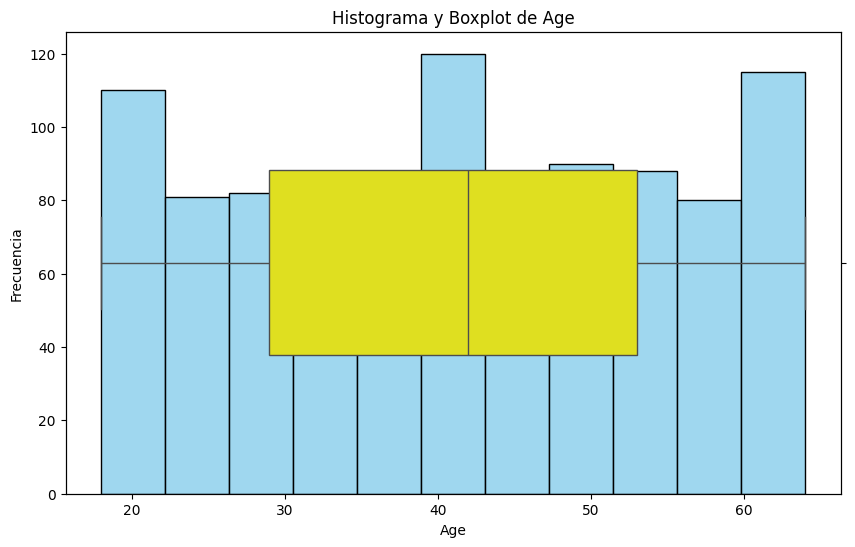

In [97]:
#Ahora combinaremos histogramas y boxplots
fig, ax1 = plt.subplots(figsize = (10, 6))
sns.histplot(data['Age'], color = 'skyblue', edgecolor = 'black', alpha = 0.8, ax = ax1)
ax1.set_title('Histograma y Boxplot de Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frecuencia')
ax2 = ax1.twinx() #Crea un segundo eje Y
sns.boxplot(x = data['Age'], color = 'yellow', ax = ax2, width = 0.4)
ax2.set_xlabel('Age')
plt.show()

In [98]:
#Viendo el histograma, hay una distribución uniforme, nos indica que no depende de la
#edad la cantidad de compras
#Si lo comparamos con el boxplot que tiene la mediana en los 40 años, podemos confirmarlo
#con el histograma. La mayoría de clientes tienen edades en torno a ese rango.
#Como el rango intercuartil es amplio, hay una gran variabilidad en la edad de los clientes.
#Los valores altos en 20 y 60 pueden ser útilies para segmentar el mercado en estrategias de marketing.